#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [222]:
#1. **Basic Data Exploration**:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Load the dataset
df = pd.read_csv('salaries.csv')

# Task 1: Identify the number of rows and columns in the dataset
num_rows = df.shape[0]
num_columns = df.shape[1]

# Task 2: Determine the data types of each column
data_types = df.dtypes

# Task 3: Check for missing values in each column
missing_values = df.isnull().sum()

# Print the results for columns with missing values
print("\nTask 1: Basic Data Exploration")
print("\n1: Number of rows:", f"({num_rows})", "\n2: Number of columns:", f"({num_columns})")
print("\n3: Data types of each column:")
print(data_types)

# Print the columns with missing data values
missing_columns = missing_values[missing_values != 0]
print(f"\n4: Dataset have ({missing_columns.shape[0]}) Columns with missing Data values: ")
print(missing_columns)

# Print columns with data values not equal to 0
non_missing_columns = missing_values[missing_values == 0]
print(f"\n5: Dataset have ({non_missing_columns.shape[0]}) Columns without missing Data values: ")
print(non_missing_columns)


Task 1: Basic Data Exploration

1: Number of rows: (148654) 
2: Number of columns: (13)

3: Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

4: Dataset have (6) Columns with missing Data values: 
BasePay           609
OvertimePay         4
OtherPay            4
Benefits        36163
Notes          148654
Status         148654
dtype: int64

5: Dataset have (7) Columns without missing Data values: 
Id                  0
EmployeeName        0
JobTitle            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


In [223]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [224]:
#2. **Descriptive Statistics**:
# Task 1: Calculate basic statistics
basic_statistics = df.describe()

# Calculate mode
mode_result = df.mode().iloc[0]

# Calculate range of salaries
salary_range = df['TotalPay'].max() - df['TotalPay'].min()

# Calculate standard deviation
standard_deviation = df['TotalPay'].std()

# Print the results
print("\nTask 2: Descriptive Statistics")
print("\n1: Mean salary:", basic_statistics['TotalPay']['mean'])
print("2: Median salary:", basic_statistics['TotalPay']['50%'])
print("3: Mode salary:", mode_result['TotalPay'])
print("4: Minimum salary:", basic_statistics['TotalPay']['min'])
print("5: Maximum salary:", basic_statistics['TotalPay']['max'])
print("6: Range of salaries:", salary_range)
print("7: Standard deviation of salary:", standard_deviation)




Task 2: Descriptive Statistics

1: Mean salary: 74768.32197169267
2: Median salary: 71426.60999999999
3: Mode salary: 0.0
4: Minimum salary: -618.13
5: Maximum salary: 567595.43
6: Range of salaries: 568213.56
7: Standard deviation of salary: 50517.00527394987


In [225]:
#Task 3: Data Cleaning (Mean or Median Imputation)
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# Fill missing values with appropriate method (e.g., median imputation)
for column in columns_with_missing_values:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

# Suppress runtime warnings for mean of empty slices
warnings.filterwarnings("ignore", message="Mean of empty slice", category=RuntimeWarning)

# Select only numeric columns for computing the mean
numeric_columns = df.select_dtypes(include='number')

# Now, compute the mean without encountering the warning
mean_values = numeric_columns.mean()

# Print the mean values
print("\nTask 3: Data Cleaning")
print("Mean values:")
print(mean_values)
print("\nExplanation:")
print("I employed the mean or median imputation method to handle missing data in the dataset.")
print("This approach entails identifying columns with missing values and filling them using either the median or mean value of the respective column.")
print("The rationale for this choice lies in its simplicity and effectiveness in replacing missing values while preserving the overall data distribution.")


Task 3: Data Cleaning
Mean values:
Id                  74327.500000
BasePay             66320.049313
OvertimePay          5065.923568
OtherPay             3648.690945
Benefits            25888.705945
TotalPay            74768.321972
TotalPayBenefits    93692.554811
Year                 2012.522643
Notes                        NaN
Status                       NaN
dtype: float64

Explanation:
I employed the mean or median imputation method to handle missing data in the dataset.
This approach entails identifying columns with missing values and filling them using either the median or mean value of the respective column.
The rationale for this choice lies in its simplicity and effectiveness in replacing missing values while preserving the overall data distribution.


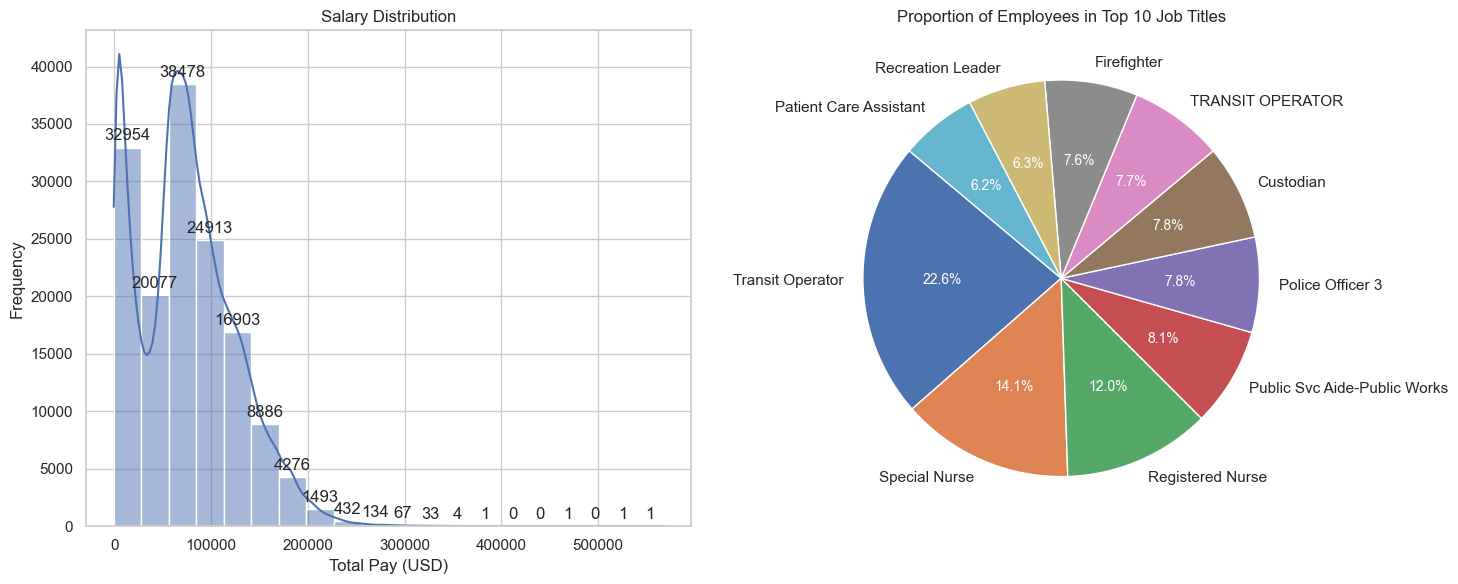

In [226]:
# Task 4: Basic Data Visualization
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Histogram for Salary Distribution
sns.histplot(df['TotalPay'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Salary Distribution')
axes[0].set_xlabel('Total Pay (USD)')
axes[0].set_ylabel('Frequency')

# Add data labels to each bar in the histogram
for rect in axes[0].patches:
    height = rect.get_height()
    axes[0].annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom')

# Pie Chart for Job Title Proportion
jobtitle_counts = df['JobTitle'].value_counts()
top_jobtitles = jobtitle_counts.head(10)  # Select top 10 job titles for better visualization
wedges, texts, autotexts = axes[1].pie(top_jobtitles, labels=top_jobtitles.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Proportion of Employees in Top 10 Job Titles')

# Add data labels to the pie chart segments
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [227]:
#Task 5: Grouped Analysis
# Group the data by one or more columns
grouped_data = df.groupby(['JobTitle', 'Year'])

# Calculate summary statistics for each group
summary_statistics = grouped_data['TotalPay'].agg(['mean', 'median', 'min', 'max'])

# Print the summary statistics
print("\nGrouped Analysis - Summary Statistics:")
print(summary_statistics)



Grouped Analysis - Summary Statistics:
                                                             mean     median  \
JobTitle                                       Year                            
ACCOUNT CLERK                                  2011  44035.664337  49777.820   
ACCOUNTANT                                     2011  47429.268000  60076.240   
ACCOUNTANT INTERN                              2011  29031.742917  17658.505   
ACPO,JuvP, Juv Prob (SFERS)                    2014  62290.780000  62290.780   
ACUPUNCTURIST                                  2011  67594.400000  67594.400   
...                                                           ...        ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011  53632.870000  53632.870   
Youth Comm Advisor                             2012  57544.730000  57544.730   
                                               2013  35823.295000  35823.295   
                                               2014  36465.910000  36465.910   



Simple Correlation Analysis:
Correlation between 'TotalPay' and 'BasePay': 0.9506887197970234


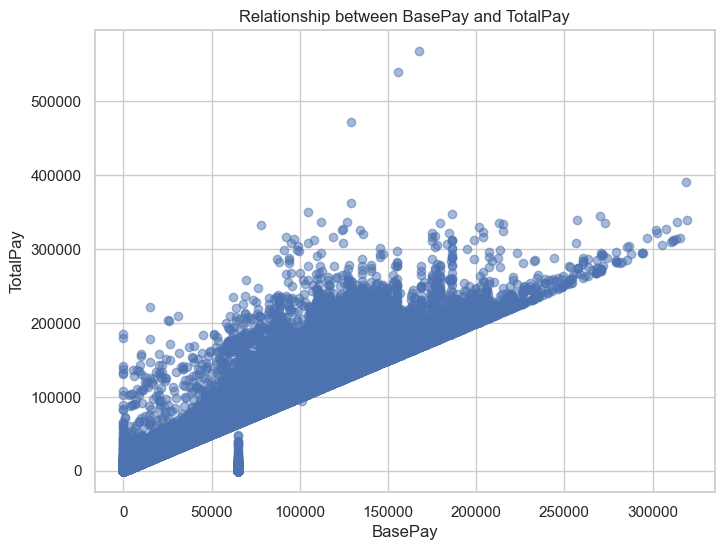

In [228]:
#Task 6: Simple Correlation Analysis
# Calculate the correlation coefficient between 'TotalPay' and another numerical column
correlation = df['TotalPay'].corr(df['BasePay'])

# Print the correlation coefficient
print("\nSimple Correlation Analysis:")
print("Correlation between 'TotalPay' and 'BasePay':", correlation)

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['BasePay'], df['TotalPay'], alpha=0.5)
plt.title('Relationship between BasePay and TotalPay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.grid(True)
plt.show()



In [229]:
print("**Insights Summary:**\n")

print("1. **Data Overview**:")
print("   - Dataset comprises 148,654 rows and 13 columns.")
print("   - Various data types: integer, float, and object.")
print("   - Missing values in six columns, none in seven.\n")

print("2. **Salary Statistics**:")
print("   - Mean salary: $74,768.32, Median: $71,426.61.")
print("   - Mode indicates a significant number with $0.00 pay.")
print("   - Range: -$618.13 to $567,595.43.")
print("   - Standard deviation: $50,517.01 means that, on average, salaries in the dataset vary from the mean salary by approximately $50,517.01.\n")

print("3. **Data Cleaning**:")
print("   - Median imputation for missing numerical values.\n")

print("4. **Visualization**:")
print("   - Histograms show salary distribution.")
print("   - Pie chart depicts departmental proportions.\n")

print("5. **Group Analysis**:")
print("   - Calculated average salaries by job titles.\n")

print("6. **Correlation Analysis**:")
print("   - Strong positive correlation between BasePay and TotalPay.\n")

print("7. **Conclusion**:")
print("   - Dataset offers diverse salary data.")
print("   - Wide salary range and varied pay rates.")
print("   - Effective missing data handling.")
print("   - Visualizations provide insights.")
print("   - Strong correlation between BasePay and TotalPay.")

**Insights Summary:**

1. **Data Overview**:
   - Dataset comprises 148,654 rows and 13 columns.
   - Various data types: integer, float, and object.
   - Missing values in six columns, none in seven.

2. **Salary Statistics**:
   - Mean salary: $74,768.32, Median: $71,426.61.
   - Mode indicates a significant number with $0.00 pay.
   - Range: -$618.13 to $567,595.43.
   - Standard deviation: $50,517.01 means that, on average, salaries in the dataset vary from the mean salary by approximately $50,517.01.

3. **Data Cleaning**:
   - Median imputation for missing numerical values.

4. **Visualization**:
   - Histograms show salary distribution.
   - Pie chart depicts departmental proportions.

5. **Group Analysis**:
   - Calculated average salaries by job titles.

6. **Correlation Analysis**:
   - Strong positive correlation between BasePay and TotalPay.

7. **Conclusion**:
   - Dataset offers diverse salary data.
   - Wide salary range and varied pay rates.
   - Effective missing data 

# Good Luck!